In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import networkx as nx
import numpy as np

In [2]:
# https://stats.wto.org/
# Products / Sector: HS code 89 - Ships, boats and floating structures
# Year: 2021

df = pd.read_excel('WtoData_20230707011812.xlsx', sheet_name='Report', skiprows=2)

In [3]:
df.drop(df[df['Partner Economy'] == 'World'].index, inplace=True)

In [4]:
df = df.rename(columns={'Reporting Economy': 'source', 'Partner Economy': 'target', '2021': 'weight'})

In [5]:
# 'source'와 'target'의 값을 정렬하고 이를 새로운 칼럼에 저장합니다.
df[['source_new', 'target_new']] = df[['source', 'target']].apply(lambda x: sorted(x), axis=1, result_type='expand')

# 이제 'source_new', 'target_new', 'weight'에 대한 그룹 별로 합계를 계산합니다.
df = df.groupby(['source_new', 'target_new'])['weight'].sum().reset_index()

# 필요에 따라 'source_new'와 'target_new' 칼럼 이름을 원래대로 변경할 수 있습니다.
df.rename(columns={'source_new': 'source', 'target_new': 'target'}, inplace=True)

In [6]:
G = nx.Graph()
G = nx.from_pandas_edgelist(df, 'source', 'target', 'weight')

In [7]:
plot_options = {"node_size": 30}

In [8]:
max_weight = max(dict(G.edges).items(), key=lambda x: x[1]['weight'])[1]['weight']

edges = G.edges()
weights = [G[u][v]['weight']/max_weight*100 for u,v in edges]

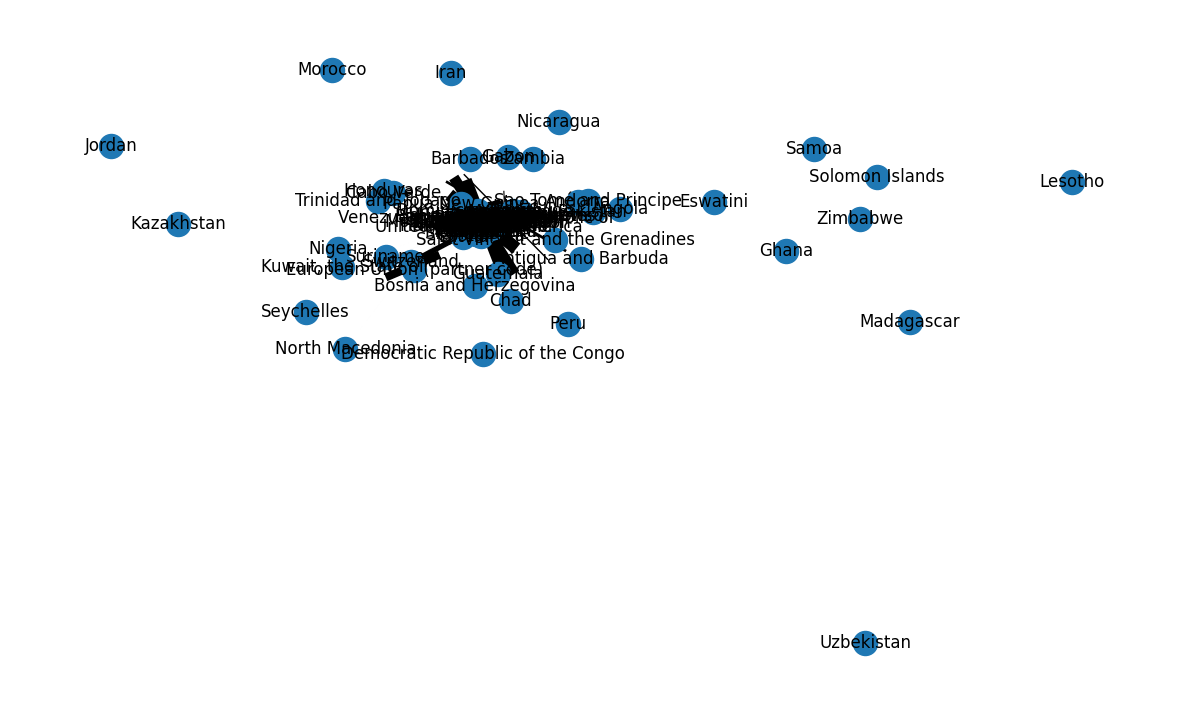

In [9]:
pos = nx.spring_layout(G, iterations=100, seed=1)
fig, ax = plt.subplots(figsize=(15, 9))
ax.axis("off")
nx.draw_networkx(G, pos=pos, ax=ax, width=weights)

In [10]:
edge_weights = nx.get_edge_attributes(G,'weight')
G.remove_edges_from((e for e, w in edge_weights.items() if w < 50000000))

remove = [node for node, degree in dict(G.degree()).items() if degree < 1]
G.remove_nodes_from(remove)

Gcc = sorted(nx.connected_components(G), key=len, reverse=True)
G0 = G.subgraph(Gcc[0])

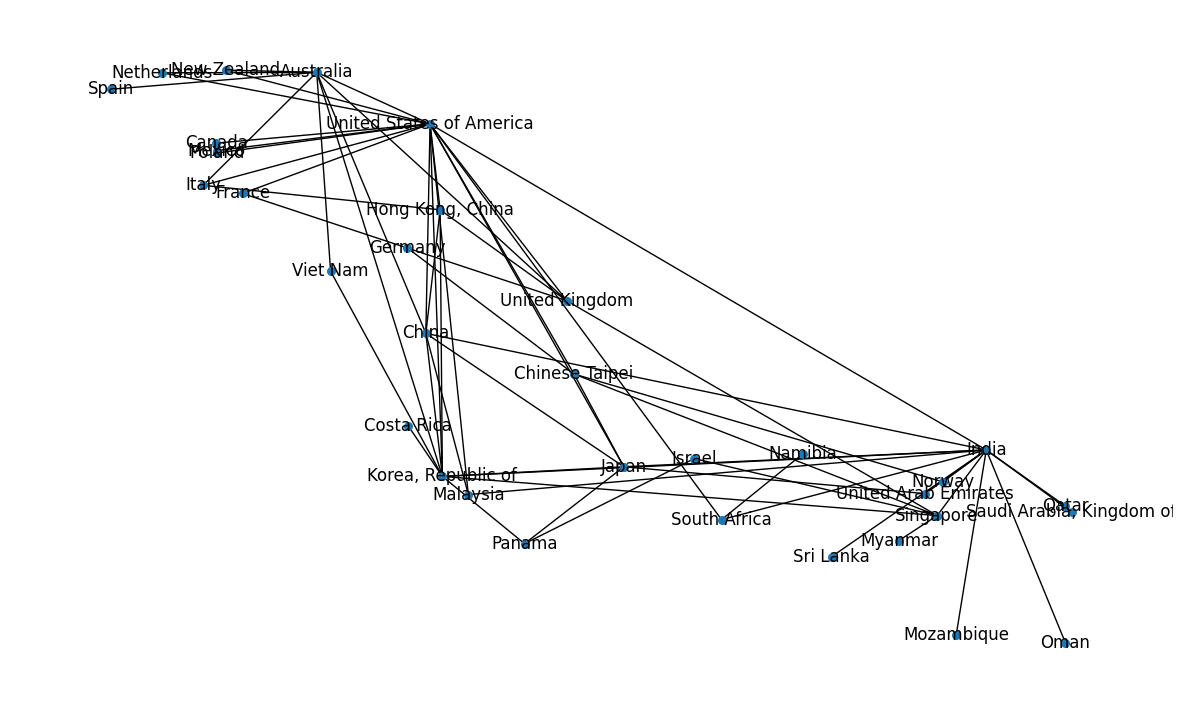

In [11]:
pos = nx.spring_layout(G0, iterations=100, seed=1)
fig, ax = plt.subplots(figsize=(15, 9))
ax.axis("off")
nx.draw_networkx(G0, pos=pos, ax=ax, **plot_options)

In [12]:
d = dict(G0.degree)
node_size=[v * 100 for v in d.values()]

max_weight = max(dict(G0.edges).items(), key=lambda x: x[1]['weight'])[1]['weight']

edges = G0.edges()
weights = [G0[u][v]['weight']/max_weight*10 for u,v in edges]

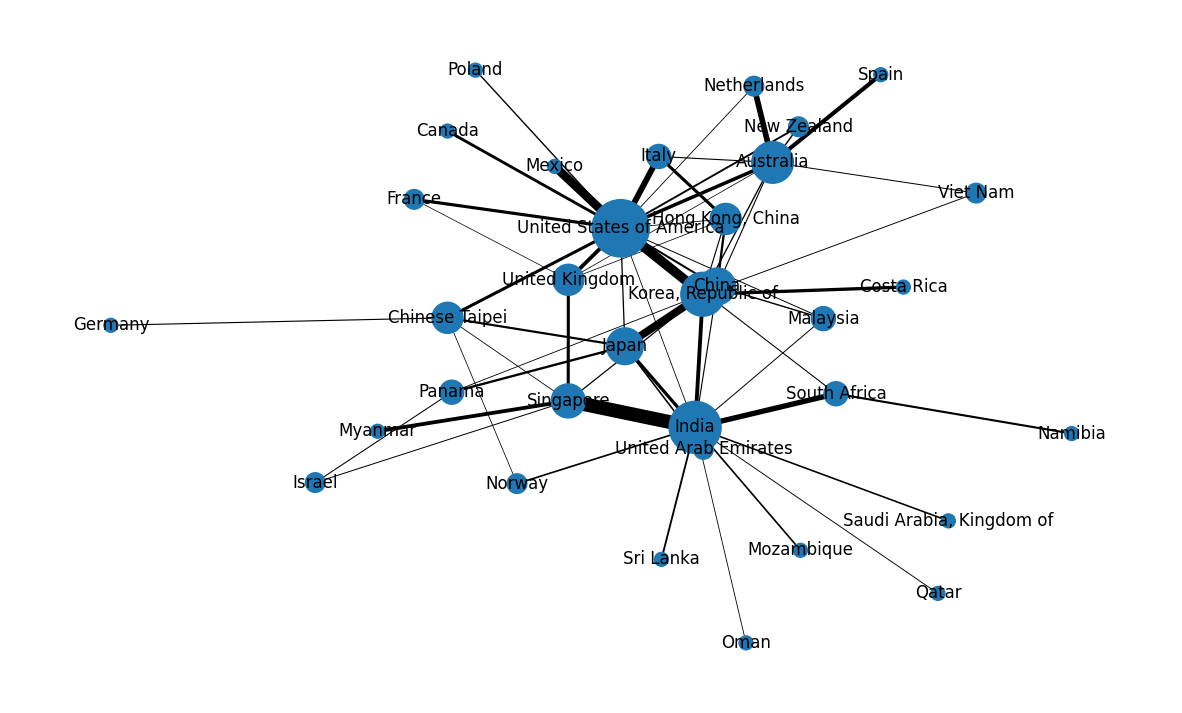

In [13]:
pos = nx.spring_layout(G0, iterations=100, seed=1, k=7)
fig, ax = plt.subplots(figsize=(15, 9))
ax.axis("off")
nx.draw_networkx(G0, pos=pos, ax=ax, node_size=node_size, width=weights)

In [14]:
comm = nx.community.louvain_communities(G0, seed=1)

In [15]:
dict_comm = dict()

cnt = 0
for nations in comm:
    for nation in nations:
        dict_comm[nation] = cnt
    cnt += 1

In [16]:
for key,n in G0.nodes.items():
   n["community"]=dict_comm[key]

In [17]:
color = nx.get_node_attributes(G0, "community")

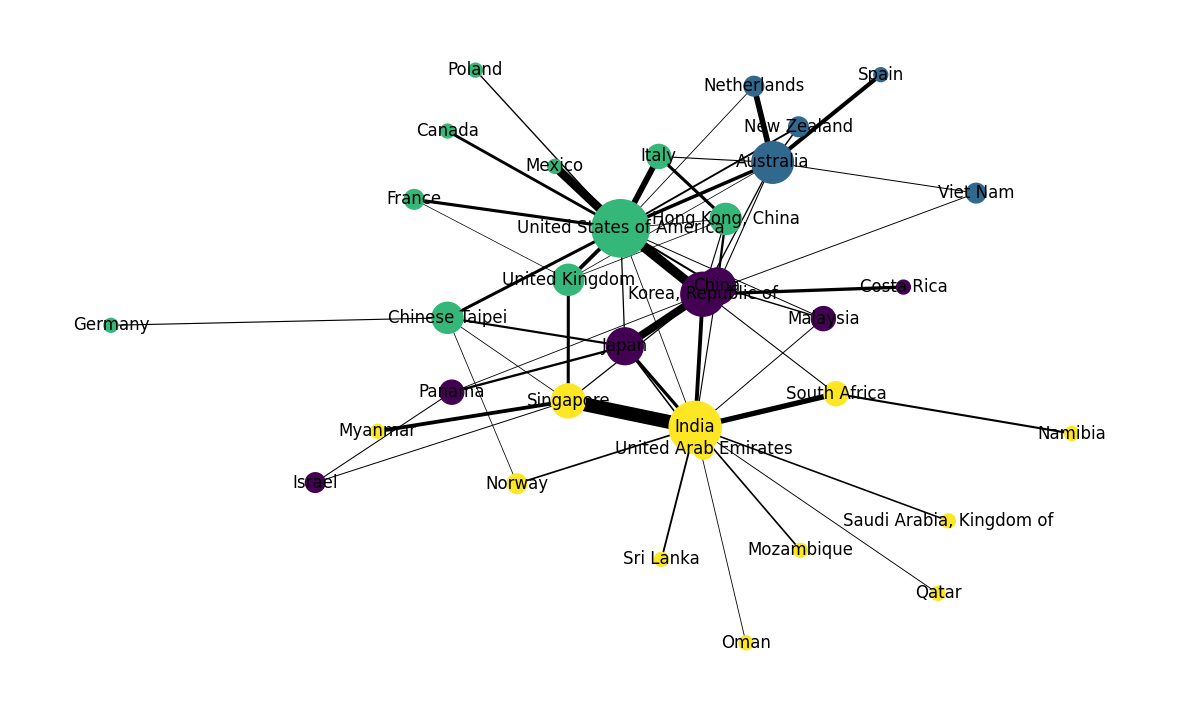

In [18]:
pos = nx.spring_layout(G0, iterations=100, seed=1, k=7)
fig, ax = plt.subplots(figsize=(15, 9))
ax.axis("off")
nx.draw_networkx(G0, pos=pos, ax=ax, node_size=node_size, width=weights, node_color=list(color.values()))

In [19]:
G0.get_edge_data('Korea, Republic of', 'Japan')

{'weight': 583268392}

In [20]:
G0.nodes()

NodeView(('South Africa', 'Korea, Republic of', 'United States of America', 'Australia', 'Canada', 'China', 'Chinese Taipei', 'France', 'Germany', 'Italy', 'Japan', 'Mexico', 'Netherlands', 'New Zealand', 'Norway', 'Poland', 'Spain', 'United Kingdom', 'Viet Nam', 'Hong Kong, China', 'India', 'Israel', 'Malaysia', 'Myanmar', 'Qatar', 'Saudi Arabia, Kingdom of', 'Singapore', 'United Arab Emirates', 'Namibia', 'Panama', 'Costa Rica', 'Mozambique', 'Oman', 'Sri Lanka'))

In [21]:
closeness_centrality = nx.centrality.closeness_centrality(G0)
(sorted(closeness_centrality.items(), key=lambda item: item[1], reverse=True))[:8]

[('United States of America', 0.6470588235294118),
 ('India', 0.6111111111111112),
 ('Korea, Republic of', 0.5689655172413793),
 ('Japan', 0.532258064516129),
 ('China', 0.5238095238095238),
 ('Australia', 0.4852941176470588),
 ('Singapore', 0.4852941176470588),
 ('South Africa', 0.4714285714285714)]

In [22]:
G0.nodes()

NodeView(('South Africa', 'Korea, Republic of', 'United States of America', 'Australia', 'Canada', 'China', 'Chinese Taipei', 'France', 'Germany', 'Italy', 'Japan', 'Mexico', 'Netherlands', 'New Zealand', 'Norway', 'Poland', 'Spain', 'United Kingdom', 'Viet Nam', 'Hong Kong, China', 'India', 'Israel', 'Malaysia', 'Myanmar', 'Qatar', 'Saudi Arabia, Kingdom of', 'Singapore', 'United Arab Emirates', 'Namibia', 'Panama', 'Costa Rica', 'Mozambique', 'Oman', 'Sri Lanka'))

In [23]:
# Import the required library
from geopy.geocoders import Nominatim

# Initialize Nominatim API
geolocator = Nominatim(user_agent="MyApp")

In [24]:
dict_location = dict()

for nation in G0.nodes():
    try:
        print(nation)
        location = geolocator.geocode(nation)
        dict_location[nation] = (location.longitude, location.latitude)
    except:
        print('except', nation)
        pass

South Africa
Korea, Republic of
United States of America
Australia
Canada
China
Chinese Taipei
France
Germany
Italy
Japan
Mexico
Netherlands
New Zealand
Norway
Poland
Spain
United Kingdom
Viet Nam
Hong Kong, China
India
Israel
Malaysia
Myanmar
Qatar
Saudi Arabia, Kingdom of
Singapore
United Arab Emirates
Namibia
Panama
Costa Rica
Mozambique
Oman
Sri Lanka


In [25]:
location = geolocator.geocode('South Korea')
dict_location['Korea, Republic of'] = (location.longitude, location.latitude)

print(dict_location['Korea, Republic of'])

(127.6961188, 36.638392)


In [26]:
weights = [G0[u][v]['weight']/max_weight*5 for u,v in edges]

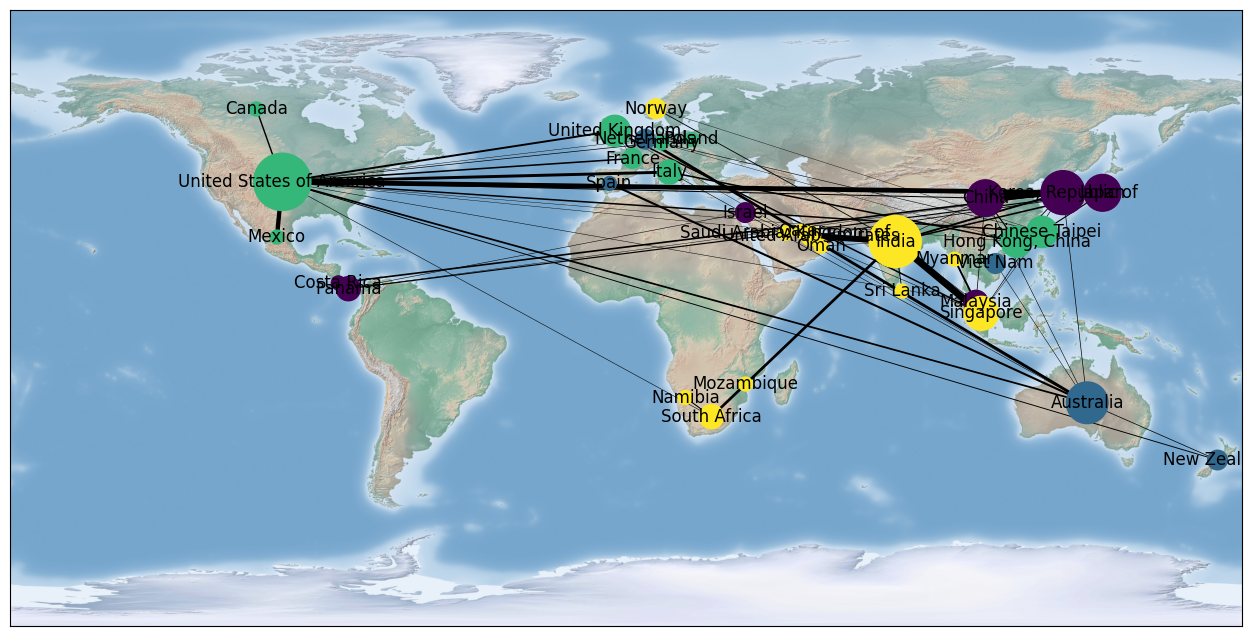

In [27]:
from mpl_toolkits.basemap import Basemap as Basemap

fig = plt.figure(figsize=(18, 8))
m = Basemap(projection='cyl', resolution=None,
            llcrnrlat=-90, urcrnrlat=90,
            llcrnrlon=-180, urcrnrlon=180, )

# draw a shaded-relief image
scale=0.2
m.shadedrelief(scale=scale)

pos = dict_location
nx.draw_networkx(G0, pos=pos, node_size=node_size, width=weights, node_color=list(color.values()))